In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Read in DataFrame

df = pd.read_csv('FY2024_068_Contracts_Full_20240214_1.csv', low_memory = False)

In [14]:
# Select the most useful columns for our analysis

cleaned_df = df

my_list = ['federal_action_obligation','total_dollars_obligated','total_outlayed_amount_for_overall_award','current_total_value_of_award','awarding_agency_name','awarding_office_name','funding_agency_name','funding_office_name','recipient_name','recipient_city_name','recipient_county_name','recipient_state_name','primary_place_of_performance_country_name','transaction_description','prime_award_base_transaction_description','action_type','product_or_service_code_description','naics_description','recovered_materials_sustainability_code','domestic_or_foreign_entity','small_business_competitiveness_demonstration_program','woman_owned_business','women_owned_small_business','economically_disadvantaged_women_owned_small_business','minority_owned_business','contracting_officers_determination_of_business_size','emerging_small_business','us_federal_government','federally_funded_research_and_development_corp','federal_agency','usaspending_permalink','potential_total_value_of_award','base_and_excersised_options_value','base_and_all_options_value','small_disadvantaged_business','award_type_code','award_type','award_type','parent_award_type_code','parent_award_type','prime_award_transaction_recipient_state_fips_code','recipient_state_code','primary_place_of_performance_country_code','primary_place_of_performance_city_name','prime_award_transaction_place_of_performance_county_fips_code','primary_place_of_performance_county_name','prime_award_transaction_place_of_performance_state_fips_code','primary_place_of_performance_state_code','primary_place_of_performance_state_name','primary_place_of_performance_zip_4','prime_award_transaction_place_of_performance_cd_original','prime_award_transaction_place_of_performance_cd_current','us_state_government','city_local_government','interstate_entity','state_controlled_institution_of_higher_learning']

In [15]:
# Filter through unecessary columns to create our new dataframe, cleaned_df

for column in cleaned_df:
  if column not in my_list:
    cleaned_df.drop(columns = column, axis = 1, inplace = True)

In [16]:
# Create another dataframe using the cleaned dataframe to filter for minority, woman owned, and small businesses

business_type_columns = ['woman_owned_business', 'minority_owned_business','women_owned_small_business']  # Add more columns if needed

# Create a boolean mask for each business type column
boolean_masks = [cleaned_df[column] == 't' for column in business_type_columns]

# Combine the boolean masks using logical AND (&) to filter rows where all conditions are True
combined_mask = boolean_masks[0]
for mask in boolean_masks[1:]:
    combined_mask &= mask

companies_with_true_values = cleaned_df[combined_mask]

# Find any outliers
companies_with_true_values.recipient_name.value_counts()

PEGASUS TECHNICAL SERVICES, INC                         40
VERACITY CONSULTING, INC.                                9
AVANTI CORPORATION                                       9
INNOVATE! INC                                            8
MPF FEDERAL, LLC                                         6
PARS ENVIRONMENTAL INC                                   4
SAMYAK SOLUTIONS, INC.                                   4
AYUDA MC2 JV LLC                                         4
ENVIRONMENTAL ENGINEERING & MEASUREMENT SERVICES INC     3
SOFTWARE INFORMATION RESOURCE CORP.                      3
VMD SYSTEMS INTEGRATORS, INC                             3
ADVENTURES BY DAWN L.L.C.                                3
SOLUTION ONE INDUSTRIES, INC.                            3
G.M. HILL ENGINEERING, INC.                              2
MERP SYSTEMS INC                                         2
THE NET.AMERICA CORPORATION                              2
FEDCORP SERVICES, INC.                                  

In [17]:
# Create a csv file out of our filtered datafram

companies_with_true_values.to_csv('Companies_with_true_values', index=False)

In [18]:
sample = df[(df['recipient_name'] == 'EASTERN RESEARCH GROUP INC')]


sample = sample[['naics_description','potential_total_value_of_award','contracting_officers_determination_of_business_size','award_type','recipient_city_name','recipient_county_name','usaspending_permalink']]

In [19]:
sample.to_csv('Sample', index=False)

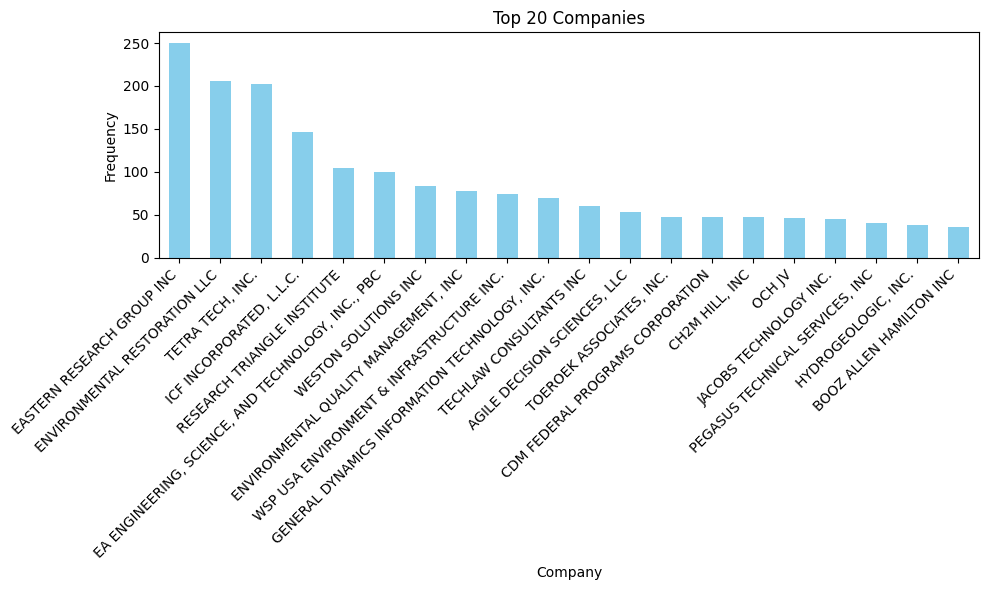

In [20]:
# Also filtered dataset for amount of times a company appeared

company_counts = cleaned_df['recipient_name'].value_counts()

top_n = 20
top_companies = company_counts.head(top_n)

# Plotting as a bar chart
top_companies.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Add labels and title
plt.title(f'Top {top_n} Companies')
plt.xlabel('Company')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()